In [18]:
import numpy as np
import pandas as pd
from datetime import date, datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('listings.csv')

In [20]:
df.drop(columns = ['listing_url','scrape_id','last_scraped','source','neighborhood_overview','picture_url','host_url','host_name','host_location','host_about',
                   'host_thumbnail_url','host_picture_url','host_neighbourhood','neighbourhood', 'calendar_updated','calendar_last_scraped', 'description','name', 
                   'host_verifications','host_response_time','host_response_rate','host_acceptance_rate','host_id','host_listings_count','host_has_profile_pic',
                   'host_identity_verified','property_type','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                   'maximum_maximum_nights','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','total_host_listings_count'], inplace=True)




In [21]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

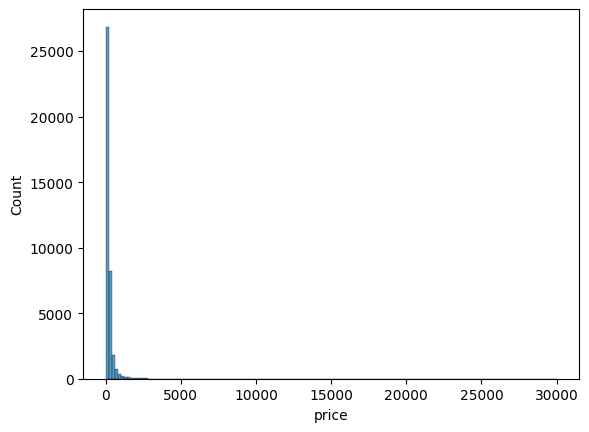

In [34]:
sns.histplot(data=df, x='price',bins =150)
plt.show

In [ ]:
df['price'].describe()


#df.loc[22409,'price'] = df.price.median()

# do we need a price per night?

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.isna().sum()

In [ ]:
# get the bathroom values
df['bathrooms_cleaned'] = df['bathrooms_text'].str.replace(r'\s.*', '', regex=True)
df['bathrooms_cleaned'] = df['bathrooms_cleaned'].apply(lambda x: 0.5 if x in ('Half-bath', 'Shared','Private') else float(x)).astype(float)

# find length of time for host
df['host_since'] = pd.to_datetime(df['host_since'])
df['today'] = pd.to_datetime(date.today())
df['host_length_years'] = (df['today'] - df['host_since']) / np.timedelta64(1, 'D')
average_days_per_month = 30.44
df['host_length_years'] = round((df['host_length_years'] *  0.0027379),2).astype(float)

values = {'host_is_superhost': 'f', 'host_has_profile_pic' :'f', 'host_identity_verified':'f', 'has_availability':'f','instant_bookable':'f',
          'reviews_per_month': 0, 'number_of_reviews':0, 'number_of_reviews_ltm':0, 'number_of_reviews_l30d':0, 'host_length_years':df['host_length_years'].median(), 'bedrooms':1, 'beds': df['beds'].median(), 'bathrooms_cleaned': df['bathrooms_cleaned'].median()}
df.fillna(value=values, inplace=True)

df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False}).astype('bool')
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False}).astype('bool')
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype('bool')

df = df.astype(
    {
        'neighbourhood_group_cleansed': 'category',
        'room_type' : 'category'
    }
)


df.drop(columns=['bathrooms','today','host_since'], inplace = True)


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,38792.0,2.820216e+17,3.854980e+17,2595.000000,1.976673e+07,4.542122e+07,7.208503e+17,9.927295e+17
host_total_listings_count,38787.0,2.284310e+02,9.778059e+02,1.000000,1.000000e+00,3.000000e+00,1.000000e+01,8.820000e+03
latitude,38792.0,4.072938e+01,5.672502e-02,40.500314,4.068879e+01,4.072629e+01,4.076267e+01,4.091138e+01
longitude,38792.0,-7.394583e+01,5.511451e-02,-74.251907,-7.398282e+01,-7.395389e+01,-7.392621e+01,-7.371365e+01
accommodates,38792.0,2.907249e+00,2.101448e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,38792.0,1.333754e+00,7.931658e-01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+01
beds,38792.0,1.639101e+00,1.162733e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,4.200000e+01
price,38792.0,2.140800e+02,4.472077e+02,0.000000,7.900000e+01,1.350000e+02,2.250000e+02,2.000000e+04
minimum_nights,38792.0,3.063998e+01,2.663326e+01,1.000000,3.000000e+01,3.000000e+01,3.000000e+01,1.250000e+03
maximum_nights,38792.0,5.701389e+04,1.090426e+07,1.000000,1.800000e+02,3.650000e+02,1.125000e+03,2.147484e+09


In [43]:
df.skew(numeric_only=True)

id                                                0.704226
host_is_superhost                                 1.461994
host_total_listings_count                         5.936083
latitude                                          0.170889
longitude                                         1.160843
accommodates                                      2.612376
bedrooms                                          9.620303
beds                                              4.007407
price                                            20.472867
minimum_nights                                   15.926881
maximum_nights                                  196.905929
minimum_nights_avg_ntm                            7.070605
maximum_nights_avg_ntm                           41.346487
has_availability                                 -1.896565
availability_30                                   1.153072
availability_60                                   0.697744
availability_90                                   0.4475

In [44]:
df['amenities'] = df['amenities'].str.replace('"', '')
df['amenities'] = df['amenities'].str.replace('[', '')
df['amenities'] = df['amenities'].str.replace(']', '')
df['amenities'] = df['amenities'].str.replace(r'\\u.*','', regex = True)
df['amenities'] = df['amenities'].str.strip()
df['free_parking_on_premises'] = df['amenities'].str.contains(r'Free parking on premises|Free driveway parking.*', case=False, regex=True)
df['paid_parking_on_premises'] = df['amenities'].str.contains(r'PAID.*PARKING.*ON PREMISES|PAID PARKING GARAGE ON PREMISES|Paid parking lot on premises|Paid valet parking on premises', case=False, regex=True)
df['parking_off_premises'] = df['amenities'].str.contains(r'.*STREET PARKING|.*PARKING OFF PREMISES|PAID PARKING LOT OFF PREMISES|PAID PARKING GARAGE OFF PREMISES', case=False, regex=True)
df['washer'] = df['amenities'].str.contains(r'WASHER|FREE WASHER|PAID WASHER', case=False, regex=True)
df['dryer'] = df['amenities'].str.contains(r'DRYER|FREE DRYER|PAID DRYER', case=False, regex=True)
df['AC'] = df['amenities'].str.contains(r'Central air conditioning|AIR CONDITIONING|Window AC unit|AC - split type ductless system', case=False, regex=True)
df['heating'] = df['amenities'].str.contains(r'HEATING|CENTRAL HEATING|Radiant heating|Heating - split type ductless system', case=False, regex=True)
df['wifi'] = df['amenities'].str.contains(r'WIFI|.*WIFI', case=False, regex=True)
df['TV'] = df['amenities'].str.contains(r'TV|TV\s.*|.*HDTV.*', case=False, regex=True)
df['self_check_in'] = df['amenities'].str.contains('Self check-in')
df['gym'] = df['amenities'].str.contains(r'GYM|Shared gym in building|PRIVATE GYM IN BUILDING', case=False, regex=True)
df['pets_allowed'] = df['amenities'].str.contains('Pets allowed')
df['kitchen'] = df['amenities'].str.contains(r'KITCHEN|KITCHENETTE', case=False, regex=True)
df['patio_balcony'] = df['amenities'].str.contains(r'.*PATIO OR BALCONY', case=False, regex=True)
df['backyard'] = df['amenities'].str.contains(r'.*BACKYARD.*', case=False, regex=True)
df['pool'] = df['amenities'].str.contains('Pool')
df['luggage_dropoff_allowed'] = df['amenities'].str.contains('Luggage dropoff allowed')

# from collections import Counter
# amenityList = []
# for row in df.itertuples():
#     # print(row)
#     for i in row.amenities.split(', '):
#         amenityList.append(i)
# print(Counter(amenityList))





# Wifi, TV, Free street parking, paid parking on premises, paid parking off premises, self check-in, dedicated workspace, pets, ac, heating, kitchen, washer, dryer, patio/balcony, backyard, long terms stays allowed private entrance, dishwasher, lock on bedroom door

Counter({'Wifi': 34031, 'Smoke alarm': 27404, 'Kitchen': 26244, 'Essentials': 23624, 'Heating': 23615, 'Hangers': 22959, 'Carbon monoxide alarm': 22429, 'Air conditioning': 22216, 'Hair dryer': 21629, 'Refrigerator': 19243, 'Dishes and silverware': 19021, 'Microwave': 18475, 'Cooking basics': 17370, 'Hot water': 17007, 'Iron': 15928, 'Shampoo': 15596, 'TV': 15547, 'Self check-in': 15155, 'Bed linens': 15109, 'First aid kit': 13743, 'Dedicated workspace': 13022, 'Fire extinguisher': 12037, 'Free street parking': 11383, 'Extra pillows and blankets': 11104, 'Cleaning products': 11029, 'Washer': 10079, 'Oven': 10046, 'Dryer': 9702, 'Coffee maker': 9109, 'Stove': 8441, 'Security cameras on property': 8205, 'Bathtub': 8127, 'Long term stays allowed': 8006, 'Luggage dropoff allowed': 7308, 'Hot water kettle': 7283, 'Lock on bedroom door': 6945, 'Body soap': 6866, 'Wine glasses': 6740, 'Private entrance': 6138, 'Elevator': 6097, 'Freezer': 5719, 'Pets allowed': 5657, 'Dining table': 5557, 'Cof

In [45]:
corrs = df.corr(numeric_only=True)
corrs.drop(columns=['latitude','longitude'],inplace=True)

targetCor = corrs.drop('price')['price']

targetCor.loc[targetCor.abs().sort_values(ascending= False).index]

# Top 10
# accommodates
# beds
# bedrooms
# host_total_listings_count
# instant_bookable
# availability_last_30_days
# availability_last_60_days
# availability_last_90_days
# availability_last_365_days
# review_score_location



# suggest we pick one availability in last x days feature and decide on if we keep has availability indicator
# 

accommodates                                    0.320162
bathrooms_cleaned                               0.241873
beds                                            0.232339
bedrooms                                        0.219496
gym                                             0.136733
host_total_listings_count                       0.128575
longitude                                      -0.125124
instant_bookable                                0.123888
kitchen                                        -0.117545
availability_30                                 0.105633
availability_60                                 0.100059
paid_parking_on_premises                        0.099052
id                                              0.093988
availability_90                                 0.093276
pets_allowed                                    0.090533
self_check_in                                   0.074628
availability_365                                0.067159
minimum_nights                 